In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
246,35,50000,0
200,35,39000,0
192,29,43000,0
313,49,141000,1
285,37,93000,1


# Train test Split

In [5]:
y=df['Purchased']  #outcome the dependent variable
X=df.drop('Purchased',axis=1)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standarization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#fit the data to the mode to find out the mean and varience then it will help us to transfrom the data
scaler.fit(X_train)

scaler.mean_ #to see the mean

# after fitting the values we can transform the values
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [9]:
# After the trasformation the value will tunr into the array so for fitting into the model we need to again convert it inot the
# dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

X_test_scaled= pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [10]:
# checking the the Standarization result
#n to chek if the data standarize or not chekk the mean and the Sd if it is mean=0 and SD=1
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

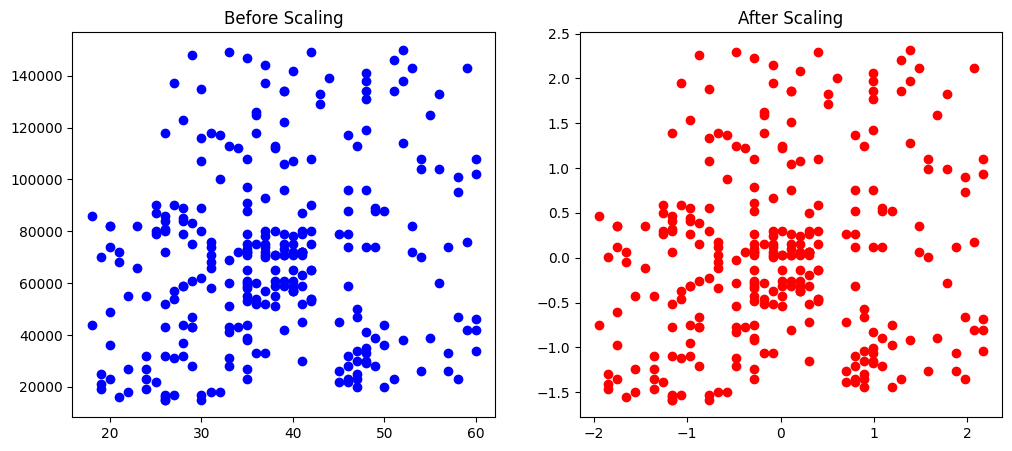

In [11]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='blue')
ax1.set_title("Before Scaling")
plt.show()
# as we cam seee that after scaling the scale szie reduced and the mean is centralized

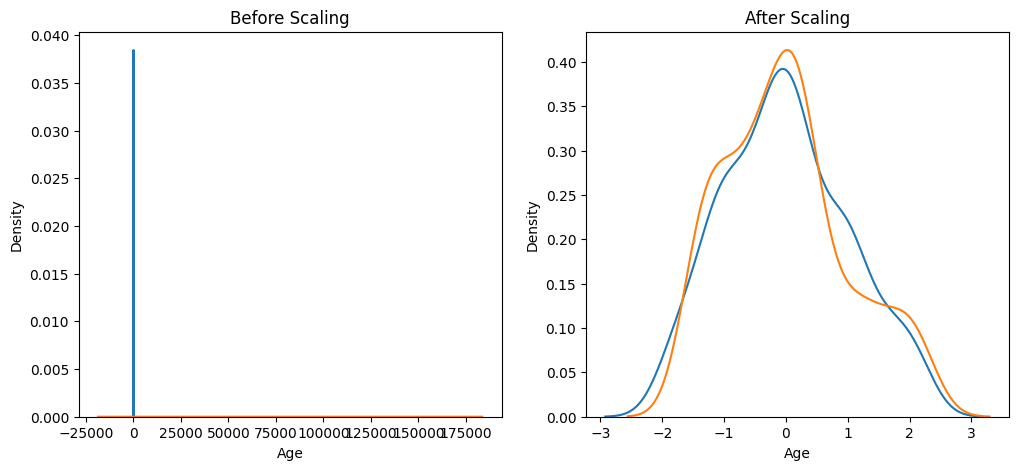

In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# Comparison of distribtion of both columns

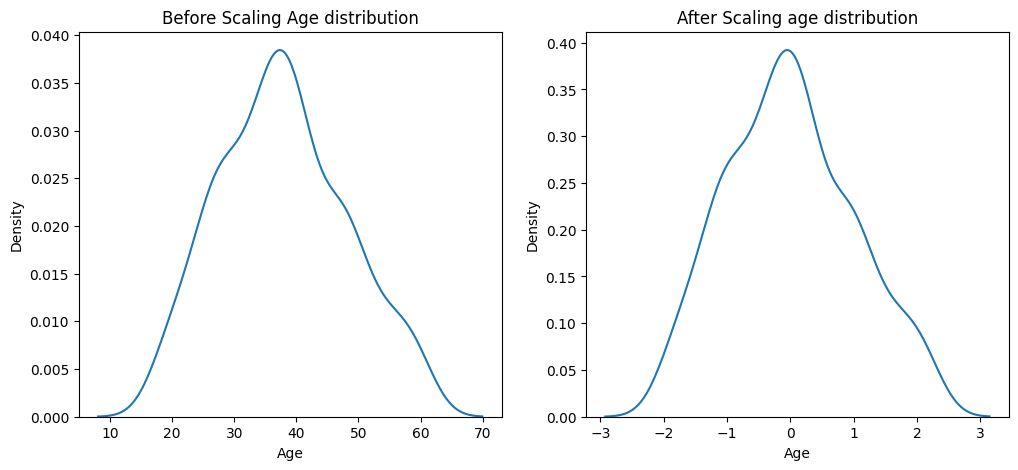

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling Age distribution")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("After Scaling age distribution")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

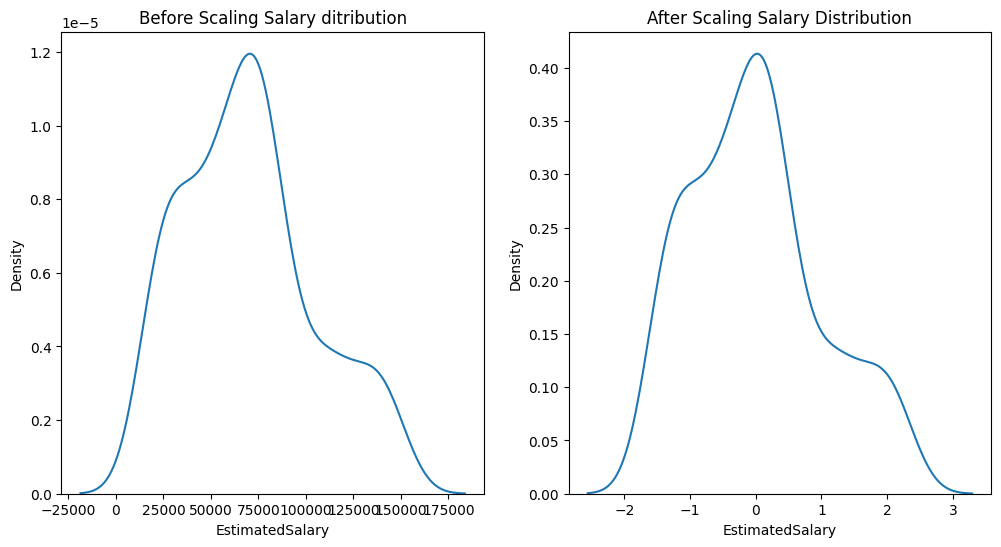

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title("Before Scaling Salary ditribution")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling Salary Distribution")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Training the Model and comparing the data based on accuracy

In [15]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
scaled_lr= LogisticRegression()

In [17]:
#training the model on the Scaled data and unscaled data

#unScaled data
lr.fit(X_train,y_train)

# Scaled data"
scaled_lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [21]:
# now after training predicting the values
y_pred=lr.predict(X_test)

y_scaled_pred= scaled_lr.predict(X_test_scaled)

In [23]:
# now testing the accuracy of the both model
from sklearn.metrics import accuracy_score

print("Data withOut scaling ",accuracy_score(y_pred,y_test))
print("Data with the Scaling ",accuracy_score(y_scaled_pred,y_test))

# as we can see that we are getting the more accuracy with the scaled data
# point to be remebered that it based on the model some model may not require scaling some may require it

Data withOut scaling  0.6583333333333333
Data with the Scaling  0.8666666666666667


## Decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
scaled_dt=DecisionTreeClassifier()

In [27]:
dt.fit(X_train,y_train)  # unscaled data

scaled_dt.fit(X_train_scaled,y_train) # scaled data

DecisionTreeClassifier()

In [31]:
# now test the both model
dt_pred= dt.predict(X_test)

dt_scaled_pred= scaled_dt.predict(X_test_scaled)

In [32]:
# accurcy tersting
print("the Acuuracy on unscaled data",accuracy_score(dt_pred,y_test))
print("Acuuracy on Scaled data ",accuracy_score(dt_scaled_pred,y_test))

the Acuuracy on unscaled data 0.875
Acuuracy on Scaled data  0.8583333333333333


# Effect of Outlier

In [36]:
df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

<ipython-input-36-e2d38590b325>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [37]:
df.describe()

,Age,EstimatedSalary,Purchased
count,406.000000,406.000000,406.000000
mean,38.034483,71672.413793,0.362069
std,11.964713,41392.175292,0.481192
min,5.000000,1000.000000,0.000000
25%,29.250000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


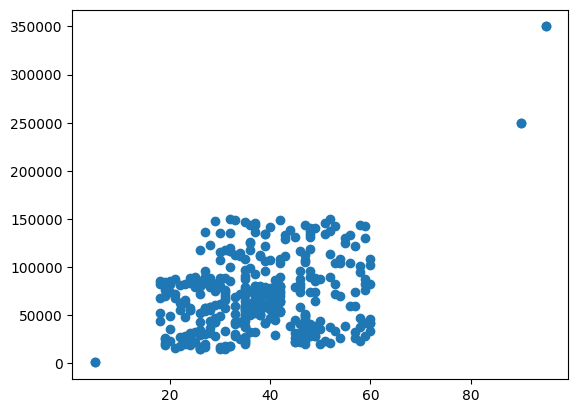

In [40]:
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [42]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [43]:
X_train.shape, X_test.shape

((284, 2), (122, 2))

In [45]:
scaler.fit(X_train)

scaled_X_train=scaler.transform(X_train)
scaled_x_test= scaler.transform(X_test)

In [46]:
scaled_X_train=pd.DataFrame(scaled_X_train,columns=X_train.columns)

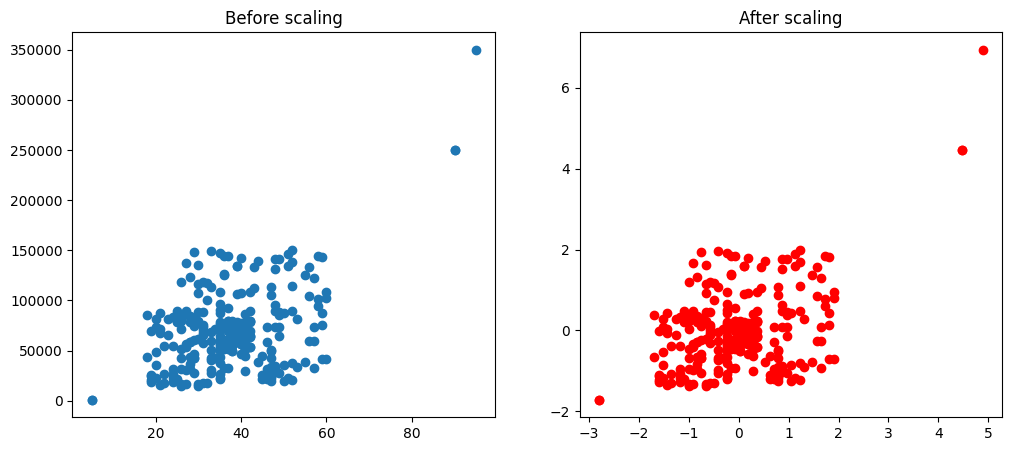

In [53]:
# so as We can seee that the Standarization have no effect on the the outliers
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])

ax2.set_title("After scaling")
ax2.scatter(scaled_X_train['Age'],scaled_X_train['EstimatedSalary'],color='red')
plt.show()